# maximizing Revenue for taxi cab drivers through payment type analysis

## Probelem Statment

##### In the fast-pased taxi booking sector,making the most of revenue is essential for long-term success and driver happiness.Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need.Our research aims is to determine wheather payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

### Objective

This projetc's main goal is to run and A/B test to examine the replationship between the total fare adn the method of payment.We use python hypothesis testing and desccriptive statistics to extract usefeul information that can elp taxi drivers generate more cash. In particular,we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

### Reasearch Question

Is there a relationship between total fare amount and payment type and can we nudge customer towards payment method that generate heigher revenue for drivers, without negatively impacting customer experience?

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df=pd.read_csv('yellow_tripdata_2020-01.csv',low_memory=False)

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


### EDA

In [4]:
df.shape

(6405008, 18)

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [6]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

In [8]:
df['duration']=df['duration'].dt.total_seconds()/60

In [9]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [10]:
dff=df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [11]:
dff

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


##### check missing value

In [12]:
dff.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [13]:
65441/len(dff)*100

1.021716132126611

In [14]:
len(dff)

6405008

In [15]:
#drop null vlues
dff=dff.copy()
dff.dropna(inplace=True)

In [16]:
dff

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [17]:
dff.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [18]:
#dff['payment_type'].dtype
print(dff['payment_type'].unique())
print(dff['payment_type'].isna().sum())

[1. 2. 4. 3. 5.]
0


In [79]:
dff.dtypes

payment_type    object
1               object
2               object
3               object
4               object
5               object
dtype: object

In [19]:
#arr=np.isinf(dff['payment_type']).sum()
# Option 1: Drop rows with NaN values
dff.dropna(subset=['passenger_count'], inplace=True)

# Option 2: Fill NaN values with a default value (e.g., 0)
dff['passenger_count'].fillna(0, inplace=True)

In [82]:
dff[dff.duplicated()]

,payment_type,1,2,3,4,5


In [20]:
dff.drop_duplicates(inplace=True)

In [21]:
dff.shape

(3007861, 5)

In [22]:
df['passenger_count'].value_counts()

passenger_count
1.0    4547226
2.0     946423
3.0     250234
5.0     225693
6.0     132154
4.0     123470
0.0     114302
7.0         29
9.0         19
8.0         17
Name: count, dtype: int64

In [23]:
dff['payment_type'].isna().sum()

np.int64(0)

In [25]:
dff['passenger_count'].value_counts(normalize=True)

passenger_count
1.0    0.581981
2.0    0.190350
3.0    0.066360
5.0    0.062937
6.0    0.039272
4.0    0.036046
0.0    0.023033
7.0    0.000009
9.0    0.000006
8.0    0.000006
Name: proportion, dtype: float64

In [26]:
dff['payment_type'].value_counts()

payment_type
1.0    2040133
2.0     925137
3.0      26233
4.0      16357
5.0          1
Name: count, dtype: int64

In [27]:
dff=dff[dff['payment_type']<3]
dff=dff[(dff['passenger_count']>0) & (dff['passenger_count']<6)]

In [28]:
dff.shape

(2780283, 5)

In [29]:
dff['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [30]:
dff

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,Card,6.0,1.20,4.800000
1,1.0,Card,7.0,1.20,7.416667
2,1.0,Card,6.0,0.60,6.183333
3,1.0,Card,5.5,0.80,4.850000
4,1.0,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3.0,Card,10.0,2.09,14.800000
6339561,1.0,Card,17.5,4.11,21.500000
6339563,1.0,Card,13.0,2.13,19.000000
6339564,1.0,Card,12.5,2.55,16.283333


In [31]:
dff.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [32]:
#remove of negative numbers
dff=dff[dff['fare_amount']>0]
dff=dff[dff['trip_distance']>0]
dff=dff[dff['duration']>0]

In [33]:
dff.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


{'whiskers': [<matplotlib.lines.Line2D at 0x223864a99a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2238646dd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x223ddf67aa0>],
 'medians': [<matplotlib.lines.Line2D at 0x2238646e390>],
 'fliers': [<matplotlib.lines.Line2D at 0x2238646e660>],
 'means': []}

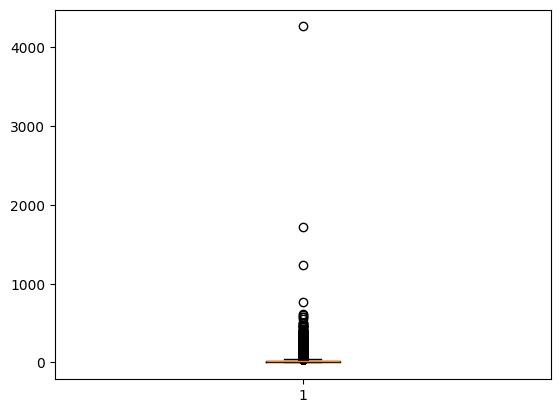

In [34]:
# checking for outliers
plt.boxplot(dff['fare_amount'])

In [35]:
for col in['fare_amount','trip_distance','duration']:
    q1=dff[col].quantile(0.25)
    q3=dff[col].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1 - 1.5 * IQR
    upper_bound=q3 + 1.5 * IQR

    
    dff=dff[(dff[col]>=lower_bound)&(dff[col]<=upper_bound)]

In [36]:
dff

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,Card,6.0,1.20,4.800000
1,1.0,Card,7.0,1.20,7.416667
2,1.0,Card,6.0,0.60,6.183333
3,1.0,Card,5.5,0.80,4.850000
5,1.0,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4.0,Card,10.5,2.40,12.383333
6339555,3.0,Card,10.0,2.09,14.800000
6339561,1.0,Card,17.5,4.11,21.500000
6339563,1.0,Card,13.0,2.13,19.000000


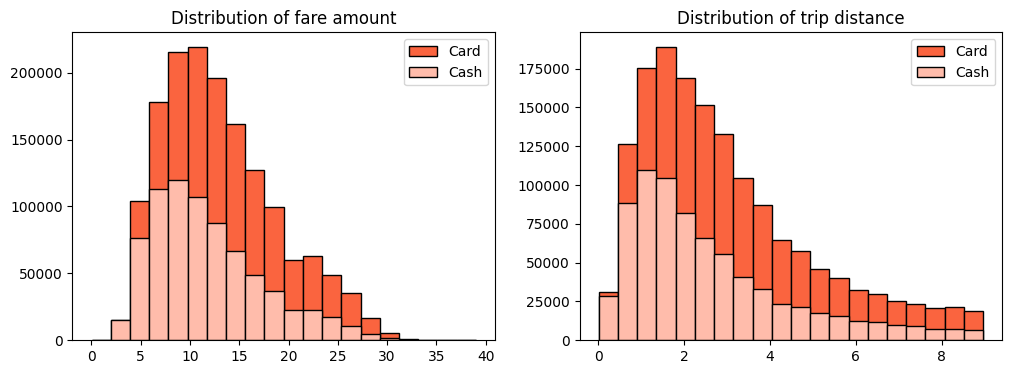

In [37]:
#data distribution in fare_amount and payment_type
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
#card payment
plt.hist(dff[dff['payment_type']=='Card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='Card')
#cash payment
plt.hist(dff[dff['payment_type']=='Cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='Cash')
plt.legend()

#distribution of trip distance
plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
#card payment
plt.hist(dff[dff['payment_type']=='Card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='Card')
#cash payment
plt.hist(dff[dff['payment_type']=='Cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='Cash')

plt.legend()
plt.show()

In [38]:
dff.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

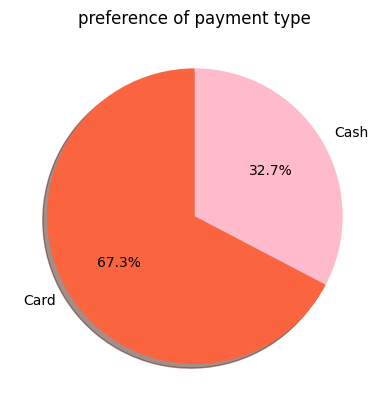

In [39]:
plt.title('preference of payment type')
plt.pie(dff['payment_type'].value_counts(normalize=True),labels=dff['payment_type'].value_counts().index,
       startangle=90,shadow=True,autopct='%1.1f%%',colors=['#FA643F','#FFBACB'])
plt.show()

In [40]:
passenger_count=dff.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)

In [41]:
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100

In [42]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1.0,909245,39.568381
1,Card,2.0,327661,14.259100
2,Card,3.0,122412,5.327106
3,Card,4.0,63676,2.771042
4,Card,5.0,124045,5.398171
5,Cash,1.0,460550,20.042143
6,Cash,2.0,155472,6.765806
7,Cash,3.0,54506,2.371984
8,Cash,4.0,32715,1.423686
9,Cash,5.0,47626,2.072581


In [53]:
dff=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
dff['payment_type']=['Card','Cash']
dff.iloc[0,1::]=passenger_count.iloc[0:5,-1]
dff.iloc[1,1:]=passenger_count.iloc[5:,-1]
dff

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


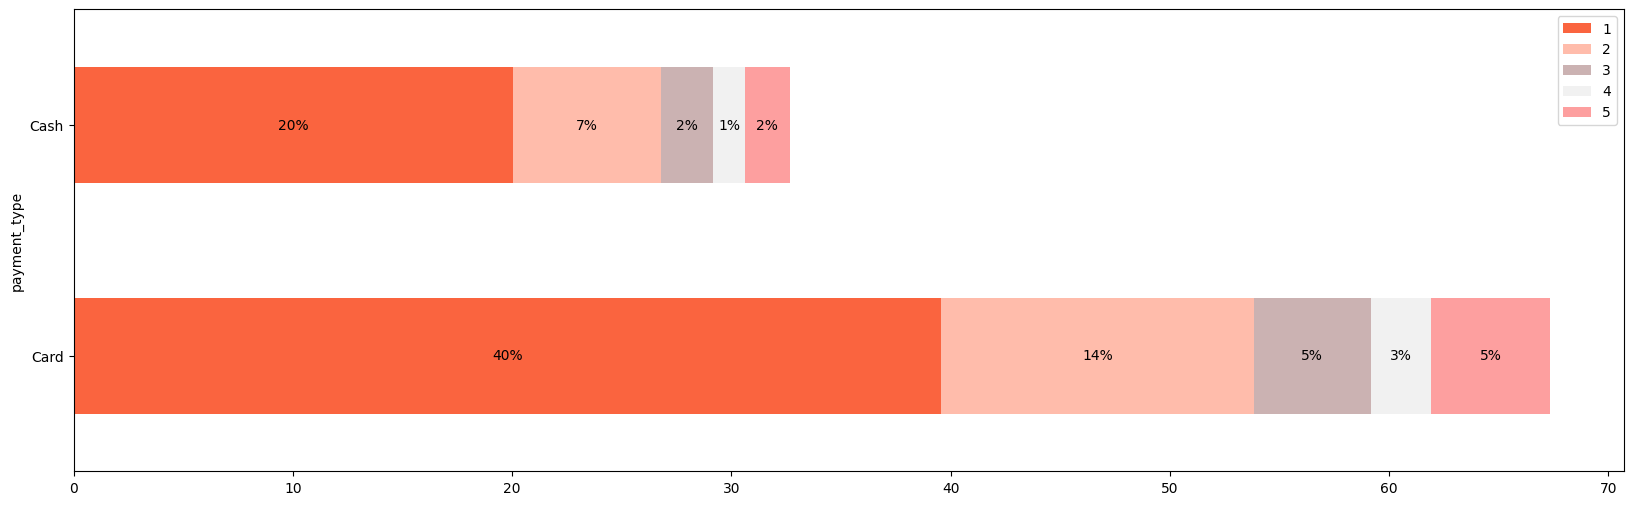

In [57]:
fig,ax=plt.subplots(figsize=(20,6))
dff.plot(x='payment_type',kind='barh',ax=ax,stacked=True,color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])

#Add pecentage text
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.text(x+width/2,
            y+height/2,
           '{:.0f}%'.format(width),
           horizontalalignment='center',
           verticalalignment='center')

null hypothesis:There is no difference in average fare between customer who use credit cards and customer who use cash.
Alternative hypothesis:There is difference in average fare between customer who use credit cards and customer who use cash.

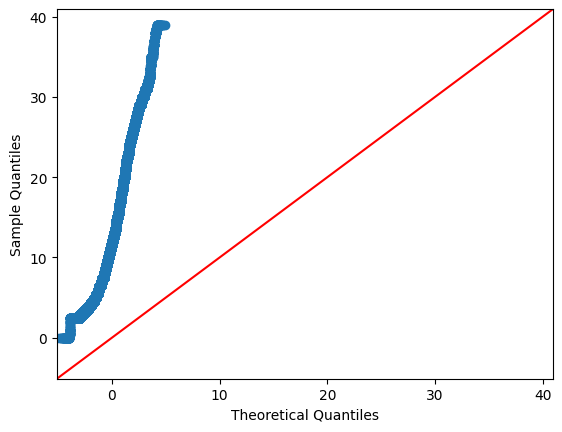

In [43]:
sm.qqplot(dff['fare_amount'],line='45')
plt.show()

In [50]:
card_sample=dff[dff['payment_type']=='Card']['fare_amount']
cash_sample=dff[dff['payment_type']=='Cash']['fare_amount']

In [51]:
t_stats,p_value=st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)
print('T statistic',t_stats,'p_value',p_value)

T statistic 169.2111527245052 p_value 0.0


with a T-statistics of 165.5 and a P-value of less than 0.05,we reject the null hypothesis,sugesting that there is indeed a sgingificant difference in avverae fare between two methods.

### Recommendations

Encouage customers to pay with cards to cpaitalize on the potential for generating more revenue for taxi cab drvers

Implement statergies such as offering incentives or discounts for credit card transaction to incenivize customers to choose this payment method.